In [2]:
import pandas as pd
import numpy as np

# Dataset

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Explorar Datos

In [4]:
display(train.head())
display(train.describe())
display(train.Survived.value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
0    549
1    342
Name: count, dtype: int64

# Extraer género del nombre

In [6]:
train.Name[-train.Name.str.contains('Mr|Mrs|Miss|Master|Don.|Dr.|Ms.|Mme.|Rev.|Col.|Major.|Countess.|Capt.|Jonkheer|Mlle.', case=False)]

Series([], Name: Name, dtype: object)

In [7]:
# Extraer el título con una expresión regular
train['Title'] = train['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
# contar titles
display(train.Title.value_counts())
#TODO: Agrupar títulos poco frecuentes

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

# Feature Engineering

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

#isalone si esta sin familia
train['IsAlone'] = train.FamilySize == 0
test['IsAlone'] = test.FamilySize == 0

#binarizar Embarked y sex
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

train['Pclass'] = train['Pclass'].astype('category')
test['Pclass'] = test['Pclass'].astype('category')

# También puedes crear dummies si usarás modelos lineales o tree-based
train = pd.get_dummies(train, columns=['Pclass'], drop_first=True)
test = pd.get_dummies(test, columns=['Pclass'], drop_first=True)

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

def age_group(age):
    if age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train['AgeGroup'] = train['Age'].apply(age_group)
test['AgeGroup'] = test['Age'].apply(age_group)

# Convertimos en variables dummies
train = pd.get_dummies(train, columns=['AgeGroup'], drop_first=True)
test = pd.get_dummies(test, columns=['AgeGroup'], drop_first=True)

# Solo la primera letra
train['CabinLetter'] = train['Cabin'].str[0]
test['CabinLetter'] = test['Cabin'].str[0]

# Rellenar NaNs con 'U' (Unknown)
train['CabinLetter'] = train['CabinLetter'].fillna('U')
test['CabinLetter'] = test['CabinLetter'].fillna('U')

# Crear variables dummy
train = pd.get_dummies(train, columns=['CabinLetter'], drop_first=True)
test = pd.get_dummies(test, columns=['CabinLetter'], drop_first=True)

# Alinear columnas de test con las del train
test = test.reindex(columns=train.columns.drop('Survived'), fill_value=0)


# Manejo de NAs

In [13]:
display(train.isna().sum())

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Title              0
FamilySize         0
IsAlone            0
sex_binarized      0
dtype: int64

In [9]:
train.Embarked.value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [10]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,sex_binarized
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,True,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,True,0


In [16]:
similar_fare = train[(train['Fare'] > 75) & (train['Fare'] < 85) & (train['Pclass'] == 1)]
print(similar_fare['Embarked'].value_counts())
# Revisar moda
print(train['Embarked'].mode())
#Se reemplaza por C, pero podría ser S
train['Embarked'] = train['Embarked'].fillna('C')


Embarked
C    16
S    13
Name: count, dtype: int64
0    S
Name: Embarked, dtype: object


# Modelling

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# --- CARGA ---
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
test_passenger_ids = test['PassengerId']

# --- COMBINAR PARA PREPROCESAR JUNTOS ---
full_data = pd.concat([train, test], sort=False).reset_index(drop=True)

# --- TITULO DESDE NAME ---
full_data['Title'] = full_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
title_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
    'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
}
full_data['Title'] = full_data['Title'].replace(title_map)

# --- IMPUTAR EDAD Y FARE ---
full_data['Age'].fillna(full_data['Age'].median(), inplace=True)
full_data['Fare'].fillna(full_data['Fare'].median(), inplace=True)

# --- EMBARKED ---

#Se reemplaza por C, pero podría ser S
full_data['Embarked'] = full_data['Embarked'].fillna('S')

# --- CABIN LETTER ---
full_data['CabinLetter'] = full_data['Cabin'].str[0].fillna('U')

# --- FAMILY FEATURES ---
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1
full_data['IsAlone'] = (full_data['FamilySize'] == 1).astype(int)

# --- AGEGROUP ---
def age_group(age):
    if age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
full_data['AgeGroup'] = full_data['Age'].apply(age_group)

# --- TICKET GROUP SIZE ---
full_data['TicketGroupSize'] = full_data.groupby('Ticket')['Ticket'].transform('count')

# ---- FARE PER PERSON ---
full_data['FarePerPerson'] = full_data['Fare'] / full_data['FamilySize']

# --- AGE CLASS INTERACTION ---
full_data['AgeClass'] = full_data['Age'] * full_data['Pclass'].astype(float)

# --- CABIN GROUP SIZE ---
full_data['HasCabin'] = full_data['Cabin'].notnull().astype(int)

# --- DECK ---
full_data['Deck'] = full_data['Cabin'].str[0].fillna('U')
full_data['Deck'] = full_data['Deck'].replace(['T', 'G', 'F'], 'Rare')

# --- TITLE FREQUENCY ---
full_data['TitleFrequency'] = full_data.groupby('Title')['Title'].transform('count')

# --- BINARIZACIÓN Y DUMMIES ---
cols_to_dummify = ['Sex', 'Embarked', 'Pclass', 'Title', 'CabinLetter', 'AgeGroup', 'Deck']
full_data = pd.get_dummies(full_data, columns=cols_to_dummify, drop_first=True)

# --- SEPARAR ---
train_clean = full_data.loc[full_data['Survived'].notnull()].copy()
test_clean = full_data.loc[full_data['Survived'].isnull()].drop(columns=['Survived'])

X = train_clean.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train_clean['Survived']
X_test = test_clean.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


# --- MODELOS ---
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

### 1. RANDOM FOREST GRID SEARCH
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X, y)
best_model = grid_rf.best_estimator_
print(f"Mejor accuracy RF: {grid_rf.best_score_:.4f}")
print(f"Mejores parámetros RF: {grid_rf.best_params_}")

# --- O --- 

### 2. XGBOOST GRID SEARCH
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# param_grid_xgb = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }
# grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_xgb.fit(X, y)
# best_model = grid_xgb.best_estimator_
# print(f"Mejor accuracy XGB: {grid_xgb.best_score_:.4f}")
# print(f"Mejores parámetros XGB: {grid_xgb.best_params_}")

# --- PREDICCIÓN Y ENVÍO ---
predictions = best_model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': predictions.astype(int)
})

submission.to_csv('../data/submission.csv', index=False)

/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_3402/4023166647.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['Age'].fillna(full_data['Age'].median(), inplace=True)
/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_3402/4023166647.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor accuracy RF: 0.8417
Mejores parámetros RF: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Resultados
Cross-validation accuracy: 0.8372

Mejor accuracy RF: 0.8417


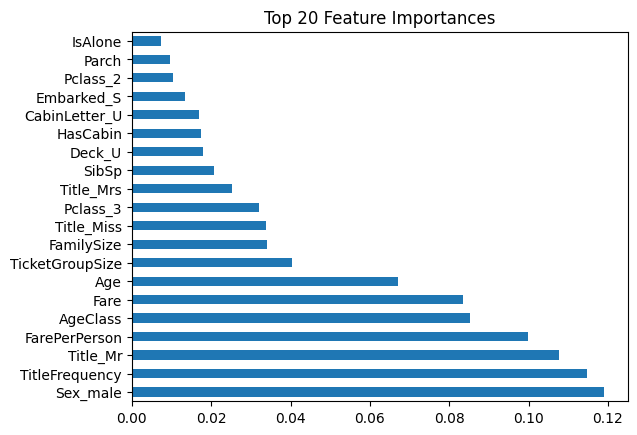

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()